In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [9]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self;
    def transform(self, X):
        return X[self.attribute_names].values

In [10]:
class MyLabelEncoder(LabelEncoder):
    def fit(self, X, y=None):
        super(MyLabelEncoder, self).fit(X)
    def transform(self, X, y=None):
        return super(MyLabelEncoder, self).transform(X)
    def fit_transform(self, X, y=None):
        tmp = super(MyLabelEncoder, self).fit(X).transform(X)
        return tmp.reshape(len(tmp), 1)

In [11]:
statcast_df = pd.read_csv('Statcast_2020.csv')
batters_df = pd.read_csv('batter_names.csv')

In [10]:
statcast_df.columns

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',


In [12]:
batters_df.head()

,last_name,first_name
0,Cabrera,Miguel
1,Cruz Jr.,Nelson
2,Peralta,David
3,Longoria,Evan
4,Cabrera,Asdrubal


In [13]:
statcast_df.description.unique()

array(['hit_into_play', 'ball', 'called_strike', 'foul',
       'swinging_strike', 'foul_tip', 'blocked_ball', 'hit_by_pitch',
       'swinging_strike_blocked', 'foul_bunt', 'missed_bunt', 'pitchout',
       'bunt_foul_tip'], dtype=object)

In [14]:
statcast_df = statcast_df[['inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'stand', 
 'p_throws', 'effective_speed', 'release_spin_rate', 'spin_axis', 'pfx_x', 
 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'description']]

In [15]:
statcast_df.head()

,inning,inning_topbot,outs_when_up,balls,strikes,stand,p_throws,effective_speed,release_spin_rate,spin_axis,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,description
0,9,Top,2,1,0,L,R,100.2,2483.0,198.0,-0.15,1.64,1.07,2.00,3.16,1.48,hit_into_play
1,9,Top,2,0,0,L,R,100.0,2522.0,189.0,0.06,1.72,1.61,3.72,3.09,1.37,ball
2,9,Top,1,3,2,R,R,90.8,2537.0,58.0,0.33,-0.45,0.24,2.56,3.20,1.55,called_strike
3,9,Top,1,3,1,R,R,101.7,2469.0,191.0,-0.27,1.55,0.37,2.35,3.42,1.58,foul
4,9,Top,1,3,0,R,R,98.9,2339.0,191.0,-0.23,1.57,0.11,3.67,3.42,1.58,swinging_strike


In [16]:
numerical = ['inning', 'outs_when_up', 'balls', 'strikes', 'effective_speed', 'release_spin_rate', 'spin_axis', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot']
categorical = ['inning_topbot']

In [17]:
statcast_df = statcast_df.dropna()

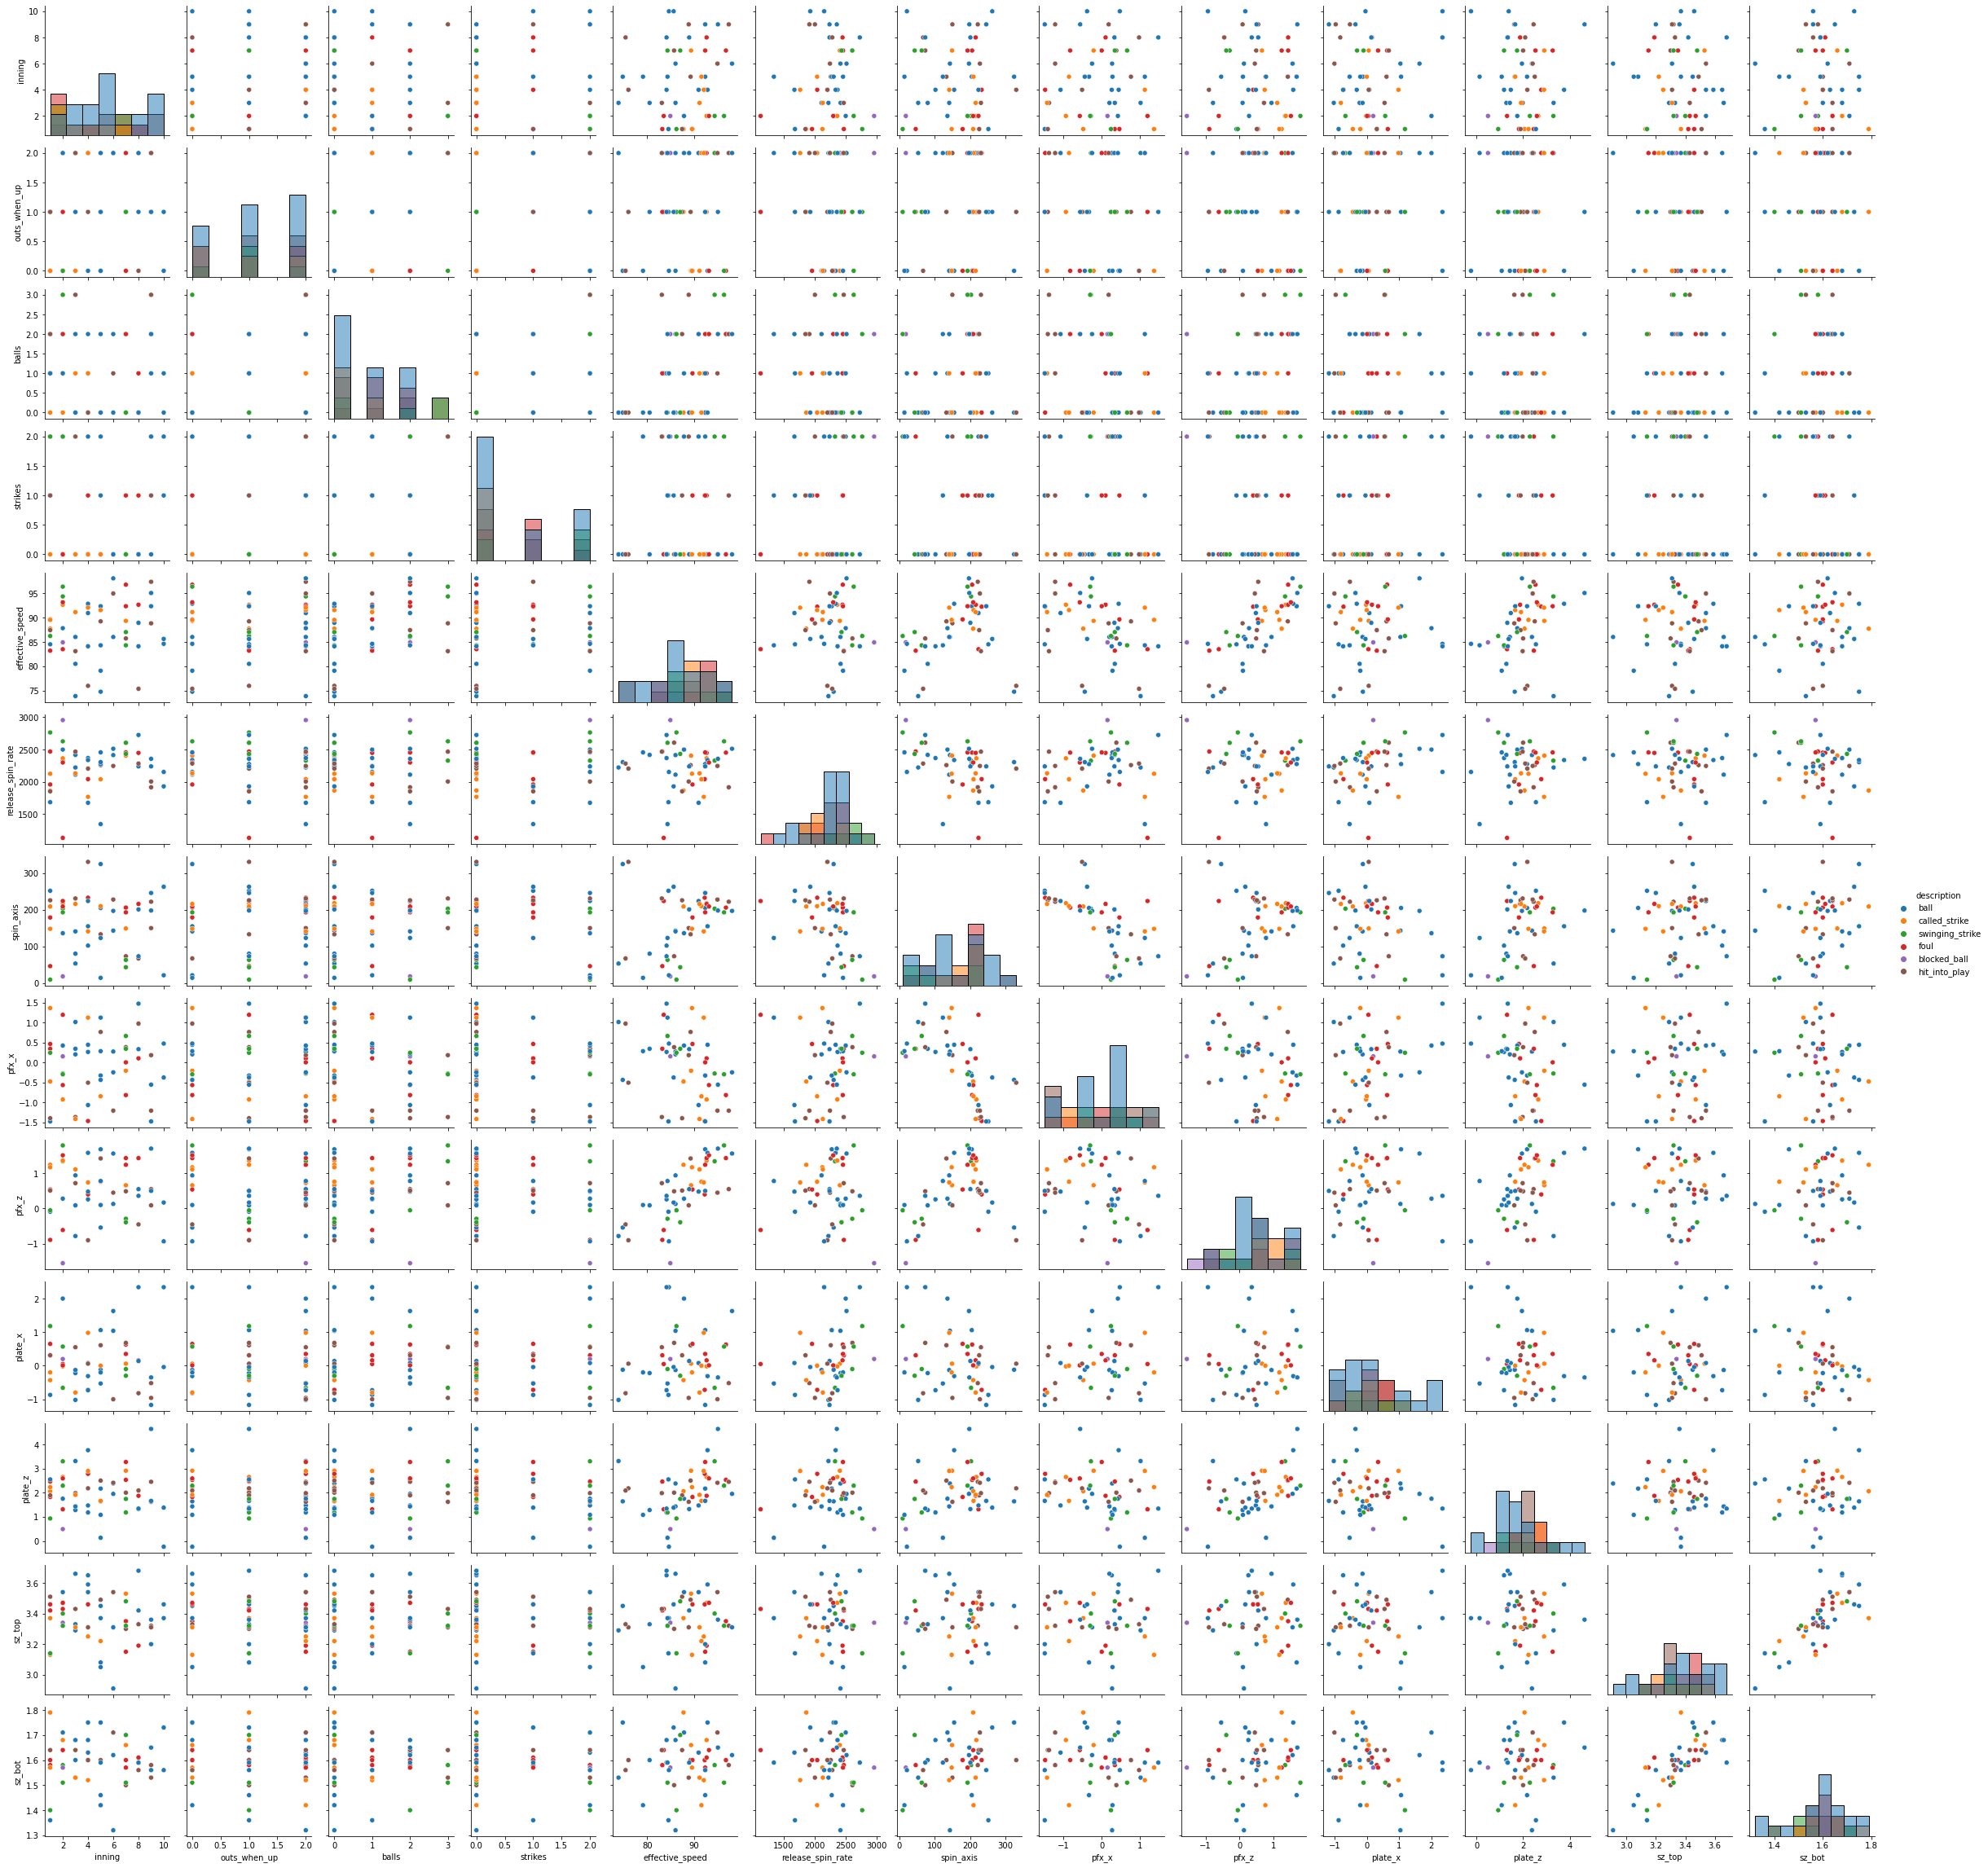

In [18]:
g = sns.PairGrid(statcast_df.sample(n=50), hue='description')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [19]:
X = statcast_df.iloc[:, :-1]
y = statcast_df.iloc[:, -1]

In [20]:
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X, y, test_size=0.3, shuffle=True)

In [21]:
le = LabelEncoder()

In [22]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical)),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical)),
    ('label_encoder', MyLabelEncoder()),
])

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [23]:
X_train_pre

,inning,inning_topbot,outs_when_up,balls,strikes,stand,p_throws,effective_speed,release_spin_rate,spin_axis,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
151407,7,Top,2,1,2,L,R,91.6,2288.0,228.0,-0.69,1.39,-0.38,3.20,3.28,1.55
112536,5,Bot,2,0,1,R,R,86.5,2168.0,221.0,0.26,0.30,-0.13,2.45,3.55,1.63
257603,4,Bot,1,0,0,R,R,92.5,2113.0,207.0,-1.11,1.34,0.33,0.67,3.32,1.53
31833,1,Top,0,3,2,R,R,85.0,2780.0,49.0,1.40,0.00,1.72,0.57,3.13,1.47
35273,6,Top,1,0,2,L,R,91.6,2614.0,224.0,-0.38,0.97,-1.91,3.18,3.40,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170180,3,Bot,2,2,1,L,R,95.6,2133.0,211.0,-1.30,0.87,1.03,1.39,3.61,1.66
196626,3,Bot,1,1,2,R,R,91.4,1969.0,218.0,-1.30,0.88,-0.04,2.33,3.54,1.68
70171,1,Bot,2,0,0,R,L,92.3,2247.0,132.0,0.52,1.47,-1.27,3.22,3.52,1.64
65412,8,Bot,0,2,1,R,R,93.9,2388.0,209.0,-0.87,1.55,-0.30,2.89,2.83,1.32


In [24]:
X_train = full_pipeline.fit_transform(X_train_pre)
le.fit(y_train_pre)
y_train = le.transform(y_train_pre)

C:\Users\ddmar\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron

In [26]:
dtc = DecisionTreeClassifier()
etc = ExtraTreeClassifier()
rfc = RandomForestClassifier()
log = LogisticRegression()

In [27]:
def cross_validate(model, features, target):
    scores = cross_val_score(model, features, target, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean(), rmse_scores.std()
models = [dtc, etc, rfc, log]

In [28]:
training_rmse = []
for model in models:
    mean, std = cross_validate(model, X_train, y_train)
    training_rmse.append([mean, std])
training_rmse = np.array(training_rmse)

C:\Users\ddmar\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\ddmar\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\ddmar\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\ddmar\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


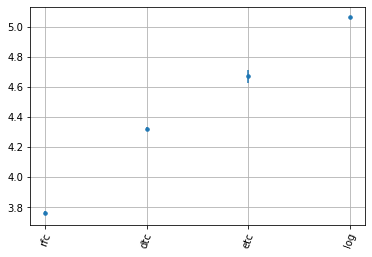

,model,error,errorstd
0,rfc,3.764364,0.012401
1,dtc,4.323031,0.011187
2,etc,4.669740,0.045784
3,log,5.061551,0.003066


In [29]:
rmse_models = pd.DataFrame({'model': ['dtc', 'etc', 'rfc', 'log'], 'error': training_rmse[:, 0],'errorstd': training_rmse[:, 1]})
#rmse_models['error'] = rmse_models.error.apply(lambda x: int(round(x)))
rmse_models = rmse_models.sort_values('error').reset_index(drop=True)
fig1, ax1 = plt.subplots()
ax1.grid()
ax1.errorbar(rmse_models['model'], rmse_models['error'], yerr=rmse_models['errorstd'], marker='.', ms=7, fmt=' ')
plt.xticks(rotation=70)
plt.show()

display(rmse_models)